In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
plt.rcParams['figure.dpi'] = 100

In [2]:
with open("benchmarks/env_info.txt") as f:
    env_info = json.load(f)

print(json.dumps(env_info, indent=2))

{
  "system_info": {
    "python": "3.9.4 | packaged by conda-forge | (default, May 10 2021, 22:13:15)  [Clang 11.1.0 ]",
    "executable": "/Users/mathisbatoul/opt/miniconda3/envs/cython_experimentations/bin/python",
    "machine": "macOS-11.3-x86_64-i386-64bit"
  },
  "dependencies_info": {
    "pip": "21.1.1",
    "setuptools": "49.6.0.post20210108",
    "sklearn": "0.24.2",
    "numpy": "1.20.2",
    "scipy": "1.6.3",
    "Cython": "0.29.23",
    "pandas": "1.2.4",
    "matplotlib": "3.4.2",
    "joblib": "1.0.1",
    "threadpoolctl": "2.1.0"
  },
  "threadpool_info": [
    {
      "filepath": "/Users/mathisbatoul/opt/miniconda3/envs/cython_experimentations/lib/libopenblasp-r0.3.15.dylib",
      "prefix": "libopenblas",
      "user_api": "blas",
      "internal_api": "openblas",
      "version": "0.3.15",
      "num_threads": 12,
      "threading_layer": "openmp"
    },
    {
      "filepath": "/Users/mathisbatoul/opt/miniconda3/envs/cython_experimentations/lib/libomp.dylib",
     

In [4]:
RESULTS_FILE_PATH = "benchmarks/results/pairwise_dist.csv"
df = pd.read_csv(RESULTS_FILE_PATH)

In [5]:
cols = ["n_samples", "n_samples", "n_features"]
df[cols] = df[cols].astype(np.uint32)

In [6]:
df_grouped = df.groupby(["n_samples", "n_features"])

In [7]:
y_labels = {
    "time_elapsed": "Time elapsed (in s)",
    "throughput": "Thoughput (in GB/s)"
}

In [9]:
OMP_NUM_THREADS = env_info["threadpool_info"][1]["num_threads"]
OPENBLAS_NUM_THREADS = env_info["threadpool_info"][0]["num_threads"]

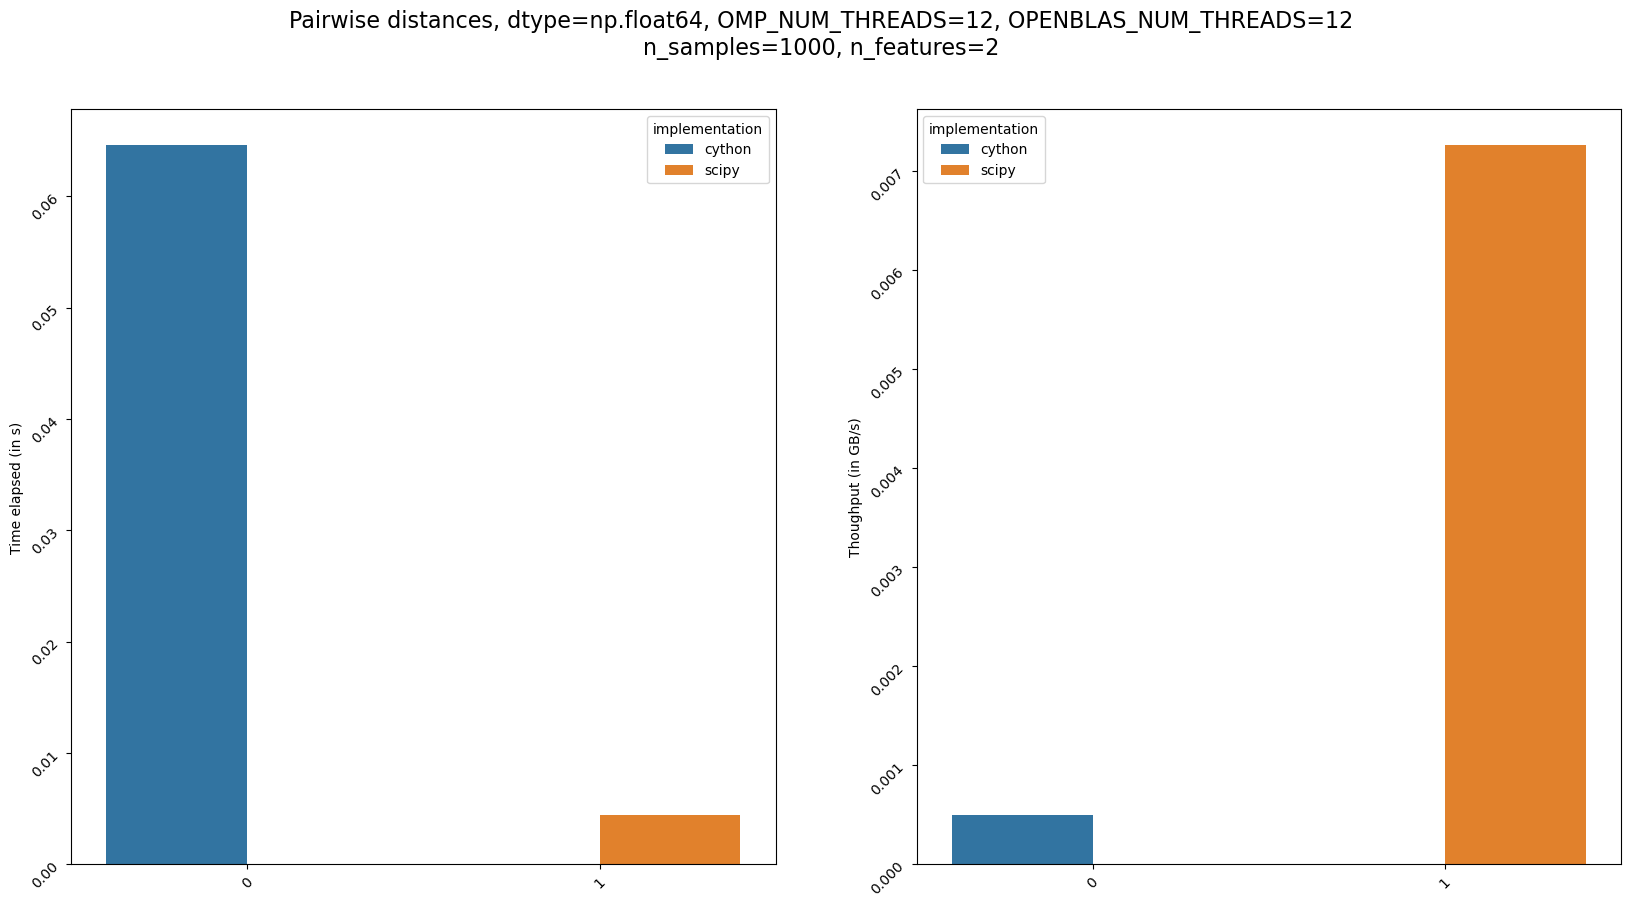

In [10]:
for vals, df in df_grouped:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    axes = axes.flatten()
    for col, ax in zip(["time_elapsed", "throughput"], axes):
        _ = sns.barplot(x=df.index, y=col, hue="implementation", data=df, ax=ax)
        _ = ax.set_ylabel(y_labels[col])
        #_ = ax.set_xlabel("Total working memory (in bytes), Chunk size (number of vectors)")
        _ = ax.tick_params(labelrotation=45)
    title = f"Pairwise distances, dtype=np.float64, "
    title += f"OMP_NUM_THREADS={OMP_NUM_THREADS}, OPENBLAS_NUM_THREADS={OPENBLAS_NUM_THREADS}\n"
    title += "n_samples=%s, n_features=%s" % vals
    _ = fig.suptitle(title, fontsize=16)